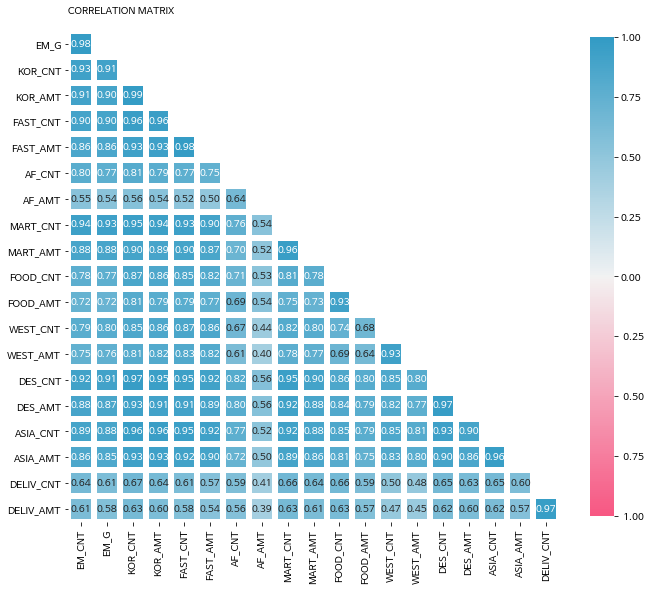

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
import os
plt.rc('font', family='NanumBarunGothic') 
# %matplotlib inline	

if __name__ == "__main__":
  ## 상관관계
  os.chdir('/content/drive/MyDrive/2021_빅콘테스트/최종 결과물/')
  food_card = pd.read_csv(os.path.join('preprocessing', 'total_data_final_known_end.csv'))
  food_card = food_card[['base_date','em_cnt','emd_nm','em_g','kor_cnt',	'kor_amt',	'fast_cnt',	'fast_amt',	'af_cnt',	'af_amt',	'mart_cnt',	'mart_amt',	'food_cnt',	'food_amt',	'west_cnt',	'west_amt',	'des_cnt',	'des_amt',	'asia_cnt',	'asia_amt',	'deliv_cnt',	'deliv_amt']]
  fig, ax = plt.subplots(figsize=(11, 11))
  df_corr = food_card.corr()

  # mask
  mask = np.triu(np.ones_like(df_corr, dtype=np.bool))

  # adjust mask and df
  mask = mask[1:, :-1]
  corr = df_corr.iloc[1:,:-1].copy()

  # color map
  cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)

  # plot heatmap
  sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", 
            linewidths=5, cmap=cmap, vmin=-1, vmax=1, 
            cbar_kws={"shrink": .8}, square=True)

  # ticks
  yticks = [i.upper() for i in corr.index]
  xticks = [i.upper() for i in corr.columns]
  plt.yticks(plt.yticks()[0], labels=yticks, rotation=0)
  plt.xticks(plt.xticks()[0], labels=xticks)

  # title
  title = 'CORRELATION MATRIX\n'
  plt.title(title, loc='left', fontsize=10)
  plt.show()